<a href="https://colab.research.google.com/github/shaina-12/Knee-Ostheoarthritis-Detection-and-Severity-Prediction/blob/main/Experiment%202/Knee_Osteoarthritis_Detection_and_Severity_Prediction_2nd_Experiment_Part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
import os
from google.colab import drive

In [ ]:
!wget https://raw.githubusercontent.com/MicrosoftDocs/pytorchfundamentals/main/computer-vision-pytorch/pytorchcv.py

--2022-10-17 12:34:18--  https://raw.githubusercontent.com/MicrosoftDocs/pytorchfundamentals/main/computer-vision-pytorch/pytorchcv.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6371 (6.2K) [text/plain]
Saving to: ‘pytorchcv.py’

pytorchcv.py        100%[===================>]   6.22K  --.-KB/s    in 0s      

2022-10-17 12:34:19 (85.8 MB/s) - ‘pytorchcv.py’ saved [6371/6371]



In [ ]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"shainamehta","key":"4fa439544351e22024b4d2ecced680fd"}'}

In [ ]:
!pip install -q kaggle

In [ ]:
!mkdir -p ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
'chmod 600 /root/.kaggle/kaggle.json'

'chmod 600 /root/.kaggle/kaggle.json'

In [ ]:
!kaggle datasets download -d shashwatwork/knee-osteoarthritis-dataset-with-severity

 99% 201M/204M [00:06<00:00, 41.6MB/s]
100% 204M/204M [00:06<00:00, 33.6MB/s]


In [ ]:
!ls

kaggle.json				       pytorchcv.py
knee-osteoarthritis-dataset-with-severity.zip  sample_data


In [ ]:
!unzip knee-osteoarthritis-dataset-with-severity.zip 

Streaming output truncated to the last 5000 lines.
  inflating: train/0/9684605R.png    
  inflating: train/0/9685238L.png    
  inflating: train/0/9685238R.png    
  inflating: train/0/9686617L.png    
  inflating: train/0/9686617R.png    
  inflating: train/0/9686777R.png    
  inflating: train/0/9686834L.png    
  inflating: train/0/9686834R.png    
  inflating: train/0/9686908L.png    
  inflating: train/0/9686908R.png    
  inflating: train/0/9687273L.png    
  inflating: train/0/9689906R.png    
  inflating: train/0/9690910L.png    
  inflating: train/0/9690910R.png    
  inflating: train/0/9691359L.png    
  inflating: train/0/9691359R.png    
  inflating: train/0/9692163L.png    
  inflating: train/0/9692604L.png    
  inflating: train/0/9692604R.png    
  inflating: train/0/9692923R.png    
  inflating: train/0/9693364R.png    
  inflating: train/0/9693599L.png    
  inflating: train/0/9693599R.png    
  inflating: train/0/9694101L.png    
  inflating: train/0/9694101R.png    

In [ ]:
!ls

auto_test    knee-osteoarthritis-dataset-with-severity.zip  sample_data  train
kaggle.json  pytorchcv.py				    test	 val


In [ ]:
!pip install torchinfo

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install pytorchcv==0.0.67

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 532 kB 33.6 MB/s 


In [ ]:
train_path = "/content/train/"
val_path = "/content/val/"
test_path = "/content/test/"

In [ ]:
grades = ['0/','1/','2/','3/','4/']
finalListTrain = []
finalTrainLabels = []
for i in range(len(grades)):
    dir_join = train_path+grades[i]
    for file in os.listdir(dir_join):
        finalListTrain.append(dir_join+file)
        if (i==0):
          finalTrainLabels.append(0)
        elif (i==1 or i==2):
          finalTrainLabels.append(1)
        else:
          finalTrainLabels.append(2)

In [ ]:
grades = ['0/','1/','2/','3/','4/']
finalListVal = []
finalValLabels = []
for i in range(len(grades)):
    dir_join = val_path+grades[i]
    for file in os.listdir(dir_join):
        finalListVal.append(dir_join+file)
        if (i==0):
          finalValLabels.append(0)
        elif (i==1 or i==2):
          finalValLabels.append(1)
        else:
          finalValLabels.append(2)

In [ ]:
grades = ['0/','1/','2/','3/','4/']
finalListTest = []
finalTestLabels = []
for i in range(len(grades)):
    dir_join = test_path+grades[i]
    for file in os.listdir(dir_join):
        finalListTest.append(dir_join+file)
        if (i==0):
          finalTestLabels.append(0)
        elif (i==1 or i==2):
          finalTestLabels.append(1)
        else:
          finalTestLabels.append(2)

In [ ]:
train_dat = {'path':finalListTrain,'label':finalTrainLabels}
val_dat = {'path':finalListVal,'label':finalValLabels}
test_dat = {'path':finalListTest,'label':finalTestLabels}

In [ ]:
train_data = pd.DataFrame.from_dict(train_dat)
train_data.head()

,path,label
0,/content/train/0/9699340R.png,0
1,/content/train/0/9728026R.png,0
2,/content/train/0/9500884R.png,0
3,/content/train/0/9177571R.png,0
4,/content/train/0/9142896L.png,0


In [ ]:
val_data = pd.DataFrame.from_dict(val_dat)
val_data.head()

,path,label
0,/content/val/0/9173434R.png,0
1,/content/val/0/9272393L.png,0
2,/content/val/0/9731969L.png,0
3,/content/val/0/9340468R.png,0
4,/content/val/0/9974824R.png,0


In [ ]:
test_data = pd.DataFrame.from_dict(test_dat)
test_data.head()

,path,label
0,/content/test/0/9527882L.png,0
1,/content/test/0/9162770L.png,0
2,/content/test/0/9789177R.png,0
3,/content/test/0/9090860R.png,0
4,/content/test/0/9156307L.png,0


In [ ]:
type(train_data)

pandas.core.frame.DataFrame

In [ ]:
train_data.count()

path     5778
label    5778
dtype: int64

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5778 entries, 0 to 5777
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   path    5778 non-null   object
 1   label   5778 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 90.4+ KB


In [ ]:
train_data.shape

(5778, 2)

In [ ]:
type(val_data)

pandas.core.frame.DataFrame

In [ ]:
val_data.count()

path     826
label    826
dtype: int64

In [ ]:
val_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 826 entries, 0 to 825
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   path    826 non-null    object
 1   label   826 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 13.0+ KB


In [ ]:
val_data.shape

(826, 2)

In [ ]:
type(test_data)

pandas.core.frame.DataFrame

In [ ]:
test_data.count()

path     1656
label    1656
dtype: int64

In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1656 entries, 0 to 1655
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   path    1656 non-null   object
 1   label   1656 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 26.0+ KB


In [ ]:
test_data.shape

(1656, 2)

In [ ]:
df = pd.DataFrame()
df['ostheoarthritis grading'] = ['Healthy','Moderate','Severe']
grade_count = []
for i in range(3):
    gc = len(train_data[train_data['label']==i]) + len(test_data[test_data['label']==i]) + len(val_data[val_data['label']==i])
    grade_count.append(gc)
df['count (training, validation and testing)'] = grade_count[:]
df

,ostheoarthritis grading,"count (training, validation and testing)"
0,Healthy,3253
1,Moderate,3670
2,Severe,1337


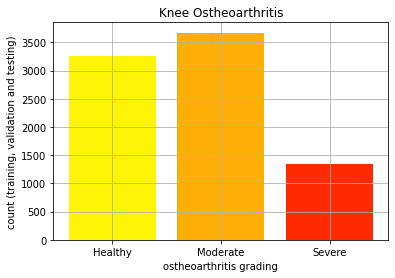

In [ ]:
x = list(np.arange(3))
y = list(df['count (training, validation and testing)'])
plt.bar(x,y,color=['#fdf505','#fdaf05','#ff2a00'])
plt.grid()
plt.xticks(x,list(df['ostheoarthritis grading']))
plt.xlabel('ostheoarthritis grading')
plt.ylabel('count (training, validation and testing)')
plt.title('Knee Ostheoarthritis')
plt.show()

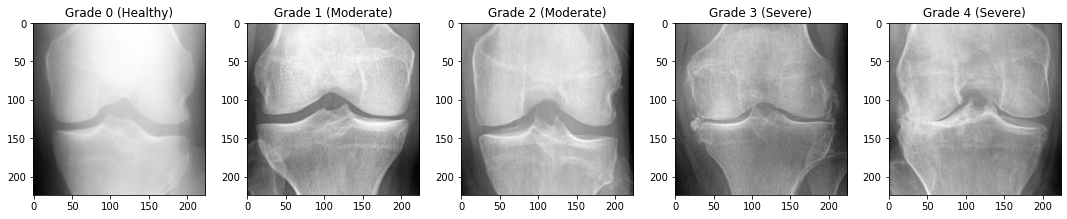

In [ ]:
fig, ax = plt.subplots(1,5,figsize=(15,15))
ax = ax.ravel()
plt.tight_layout()
ax = ax.ravel()
plt.tight_layout()
ldata = ['/content/train/0/9005656L.png',
         '/content/train/1/9008561R.png',
        '/content/train/2/9024940L.png',
        '/content/train/3/9037823L.png',
        '/content/train/4/9204055R.png']
lab = ['Grade 0 (Healthy)','Grade 1 (Moderate)','Grade 2 (Moderate)','Grade 3 (Severe)','Grade 4 (Severe)']
for i in range(0,5):
    ax[i].imshow(plt.imread(ldata[i]), cmap='gray')
    ax[i].set_title(lab[i])
plt.show()

In [ ]:
import torch 
import torch.nn as nn
import torch.nn.functional as p
import torchvision
from torchvision import datasets, transforms
import torch.optim as optim
import torch.utils.data as da
from torch.utils.data import Dataset, DataLoader
from skimage import io
import cv2 as cv
from pytorchcv import train, plot_results, display_dataset
from PIL import Image
from torchinfo import summary

In [ ]:
def scaler(img): # normal preprocessing function used originally but poor accuracy on test set
    return img/127.5 -1 # scale the pixels between -1 and + 1
def scalar(img):# try using adaptive thresholding on images to improve training accuracy
    img=np.array(img, dtype='uint8')
    img=cv.cvtColor(img, cv.COLOR_RGB2GRAY)    
    th2 = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 21, 2);
    #img=cv.cvtColor(th2, cv.COLOR_GRAY2RGB)
    #img=np.array(img, dtype=('float32'))  
    return img

In [ ]:
my_transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=3),
    transforms.Resize((256,256)),
    transforms.CenterCrop((224,224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

In [ ]:
class ImageDataset(Dataset):
    def __init__(self,d,transform=None):
        self.annotations = d
        self.transform = transform
    def __len__(self):
        return len(self.annotations)
    def __getitem__(self,index):
        image = cv.imread(os.path.join(self.annotations.iloc[index, 0]))   #io.imread(os.path.join(self.annotations.iloc[index, 0]))
        image = scalar(image)
        image = Image.fromarray(image)
        label = torch.tensor(int(self.annotations.iloc[index, 1]))
        if self.transform:
            image = self.transform(image)
        #image = torch.reshape(image, (1,64,64))
        return (image, label)

In [ ]:
resnet = torchvision.models.resnet152(pretrained=True)
resnet.to('cuda')
print(resnet)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [ ]:
summary(resnet)

Layer (type:depth-idx)                   Param #
ResNet                                   --
├─Conv2d: 1-1                            9,408
├─BatchNorm2d: 1-2                       128
├─ReLU: 1-3                              --
├─MaxPool2d: 1-4                         --
├─Sequential: 1-5                        --
│    └─Bottleneck: 2-1                   --
│    │    └─Conv2d: 3-1                  4,096
│    │    └─BatchNorm2d: 3-2             128
│    │    └─Conv2d: 3-3                  36,864
│    │    └─BatchNorm2d: 3-4             128
│    │    └─Conv2d: 3-5                  16,384
│    │    └─BatchNorm2d: 3-6             512
│    │    └─ReLU: 3-7                    --
│    │    └─Sequential: 3-8              16,896
│    └─Bottleneck: 2-2                   --
│    │    └─Conv2d: 3-9                  16,384
│    │    └─BatchNorm2d: 3-10            128
│    │    └─Conv2d: 3-11                 36,864
│    │    └─BatchNorm2d: 3-12            128
│    │    └─Conv2d: 3-13               

In [ ]:
train_set = ImageDataset(d=train_data, transform=my_transform)
val_set = ImageDataset(d=val_data, transform=my_transform)
test_set = ImageDataset(d=test_data, transform=my_transform)

In [ ]:
batch_size= 32
train_dl = DataLoader(train_set,batch_size=batch_size)
val_dl = DataLoader(val_set,batch_size=batch_size)
test_dl = DataLoader(test_set,batch_size=batch_size)

In [ ]:
resnet.fc = nn.Sequential(nn.Linear(resnet.fc.in_features, 3),nn.Softmax())

In [ ]:
for x in resnet.conv1.parameters() :
  x.requires_grad = False

In [ ]:
for x in resnet.bn1.parameters() :
  x.requires_grad = False

In [ ]:
for x in resnet.relu.parameters() :
  x.requires_grad = False

In [ ]:
for x in resnet.maxpool.parameters() :
  x.requires_grad = False

In [ ]:
for x in resnet.layer1.parameters() :
  x.requires_grad = False

In [ ]:
for x in resnet.layer2.parameters() :
  x.requires_grad = False

In [ ]:
for x in resnet.layer3.parameters() :
  x.requires_grad = False

In [ ]:
for x in resnet.layer4.parameters() :
  x.requires_grad = False

In [ ]:
summary(resnet,(1, 3,224,224))

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/container.py:139: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Layer (type:depth-idx)                   Output Shape              Param #
ResNet                                   [1, 3]                    --
├─Conv2d: 1-1                            [1, 64, 112, 112]         (9,408)
├─BatchNorm2d: 1-2                       [1, 64, 112, 112]         (128)
├─ReLU: 1-3                              [1, 64, 112, 112]         --
├─MaxPool2d: 1-4                         [1, 64, 56, 56]           --
├─Sequential: 1-5                        [1, 256, 56, 56]          --
│    └─Bottleneck: 2-1                   [1, 256, 56, 56]          --
│    │    └─Conv2d: 3-1                  [1, 64, 56, 56]           (4,096)
│    │    └─BatchNorm2d: 3-2             [1, 64, 56, 56]           (128)
│    │    └─ReLU: 3-3                    [1, 64, 56, 56]           --
│    │    └─Conv2d: 3-4                  [1, 64, 56, 56]           (36,864)
│    │    └─BatchNorm2d: 3-5             [1, 64, 56, 56]           (128)
│    │    └─ReLU: 3-6                    [1, 64, 56, 56]    

In [ ]:
def train_epoch(net,dataloader,lr=0.01,optimizer=None,loss_fn = nn.NLLLoss()):
    optimizer = optimizer or torch.optim.Adam(net.parameters(),lr=lr)
    net.train()
    total_loss,acc,count = 0,0,0
    for features,labels in dataloader:
        optimizer.zero_grad()
        lbls = labels.to('cuda')
        out = net(features.to('cuda'))
        #print(lbls)
        loss = loss_fn(out,lbls) #cross_entropy(out,labels)
        loss.backward()
        optimizer.step()
        total_loss+=loss
        _,predicted = torch.max(out,1)
        acc+=(predicted==lbls).sum()
        count+=len(labels)
    return total_loss.item()/count, acc.item()/count

def validate(net, dataloader,loss_fn=nn.NLLLoss()):
    net.eval()
    count,acc,loss = 0,0,0
    with torch.no_grad():
        for features,labels in dataloader:
            lbls = labels.to('cuda')
            out = net(features.to('cuda'))
            loss += loss_fn(out,lbls) 
            pred = torch.max(out,1)[1]
            acc += (pred==lbls).sum()
            count += len(labels)
    return loss.item()/count, acc.item()/count

def train(net,train_loader,test_loader,optimizer=None,lr=0.01,epochs=10,loss_fn=nn.NLLLoss()):
    optimizer = optimizer or torch.optim.Adam(net.parameters(),lr=lr)
    res = { 'train_loss' : [], 'train_acc': [], 'val_loss': [], 'val_acc': []}
    for ep in range(epochs):
        tl,ta = train_epoch(net,train_loader,optimizer=optimizer,lr=lr,loss_fn=loss_fn)
        vl,va = validate(net,test_loader,loss_fn=loss_fn)
        print(f"Epoch {ep:2}, Train acc={ta:.3f}, Val acc={va:.3f}, Train loss={tl:.3f}, Val loss={vl:.3f}")
        res['train_loss'].append(tl)
        res['train_acc'].append(ta)
        res['val_loss'].append(vl)
        res['val_acc'].append(va)
    return res

In [ ]:
epochs = 10
learning_rate = 0.01
loss_fn = nn.CrossEntropyLoss()
optimize = torch.optim.Adam(resnet.parameters(), lr=learning_rate)

In [139]:
hist = train(resnet,train_dl,val_dl,optimize,learning_rate,epochs,loss_fn)

Epoch  0, Train acc=0.396, Val acc=0.397, Train loss=0.036, Val loss=0.036
Epoch  1, Train acc=0.396, Val acc=0.397, Train loss=0.036, Val loss=0.036
Epoch  2, Train acc=0.396, Val acc=0.397, Train loss=0.036, Val loss=0.036
Epoch  3, Train acc=0.396, Val acc=0.397, Train loss=0.036, Val loss=0.036
Epoch  4, Train acc=0.396, Val acc=0.397, Train loss=0.036, Val loss=0.036
Epoch  5, Train acc=0.396, Val acc=0.397, Train loss=0.036, Val loss=0.036
Epoch  6, Train acc=0.396, Val acc=0.397, Train loss=0.036, Val loss=0.036
Epoch  7, Train acc=0.396, Val acc=0.397, Train loss=0.036, Val loss=0.036
Epoch  8, Train acc=0.396, Val acc=0.397, Train loss=0.036, Val loss=0.036
Epoch  9, Train acc=0.396, Val acc=0.397, Train loss=0.036, Val loss=0.036


In [140]:
vl,va = validate(resnet,test_dl,loss_fn=loss_fn)
print(f"Test acc={va:.3f}, Test loss={vl:.3f}")

Test acc=0.386, Test loss=0.037


In [ ]:
resnet.parameters